Instructions:

Dataset Acquisition:

Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets available directly through Python libraries.


Exploratory Data Analysis (EDA):

Load the Titanic dataset into a Pandas DataFrame.
Use Pandas methods to explore and understand the dataset:
- Display the first few rows to get an overview of the data structure.
- Check the dimensions of the dataset (number of rows and columns).
- Identify missing values and decide on strategies for handling them.
- Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
- Analyze categorical variables (e.g., value counts).


Data Visualization:

Choose one column of the dataset that interests you
Use Matplotlib pyplot to create a meaningful visualization:
- Select an appropriate plot type (e.g., bar chart, histogram, pie chart).
- Label axes, add a title.
- Ensure the visualization is clear, informative, and visually appealing. smile

Submission:

You can include code snippets, comments explaining your thought process
Submit your completed assignment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
titanic_df = pd.read_csv('/content/train.csv')
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
rows, columns = titanic_df.shape
print(f'Dataset contains {rows} rows and  {columns} columns.')
titanic_df.isnull().sum()
print(titanic_df.isnull().sum())


Dataset contains 891 rows and  12 columns.
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
fill_values = {
    'Age': titanic_df['Age'].mean(),
    'Cabin': 0,
    'Embarked': 0
}

titanic_df.fillna(fill_values, inplace=True)
print(titanic_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
numerical_df = titanic_df.select_dtypes(include='number')

min_values = numerical_df.min()
max_values = numerical_df.max()
mean_values = numerical_df.mean()
median_values = numerical_df.median()

statistics = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values,
    'Median': median_values
})

print(statistics)


              Min       Max        Mean      Median
PassengerId  1.00  891.0000  446.000000  446.000000
Survived     0.00    1.0000    0.383838    0.000000
Pclass       1.00    3.0000    2.308642    3.000000
Age          0.42   80.0000   29.699118   29.699118
SibSp        0.00    8.0000    0.523008    0.000000
Parch        0.00    6.0000    0.381594    0.000000
Fare         0.00  512.3292   32.204208   14.454200


In [ ]:
titanic_df['Age'].value_counts()
unique_passengers = titanic_df['PassengerId'].nunique()
number_of_kids = titanic_df[titanic_df['Age'] < 18]
survived_passengers = titanic_df[titanic_df['Survived'] == 1]
survived_kids = number_of_kids[number_of_kids['Survived'] == 1]
survived_male_passengers = survived_passengers[survived_passengers['Sex'] == 'male']
survived_female_passengers = survived_passengers[survived_passengers['Sex'] == 'female']
survived_male_kids = survived_kids[survived_kids['Sex'] == 'male']
survived_female_kids = survived_kids[survived_kids['Sex'] == 'female']
print(f'There were {unique_passengers} passengers on Titanic and {len(number_of_kids)} of them were kids.')
print(f'There were {len(survived_passengers)} survivors (male: {len(survived_male_passengers)}, female: {len(survived_female_passengers)}) and {len(survived_kids)} of them were kids (male: {len(survived_male_kids)}, female: {len(survived_female_kids)}).')


There were 891 passengers on Titanic and 113 of them were kids.
There were 342 survivors (male: 109, female: 233) and 61 of them were kids (male: 23, female: 38).


In [ ]:
import seaborn as sns

In [ ]:
sex_df = titanic_df['Sex'].value_counts()
sex_df.head()

,count
Sex,
male,577
female,314


In [ ]:
titanic_df['Sex_encoded'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

correlation = titanic_df[['Sex_encoded', 'Survived']].corr().loc['Sex_encoded', 'Survived']

print(f"Correlation between Sex and Survival: {correlation:.2f}")

Correlation between Sex and Survival: 0.54


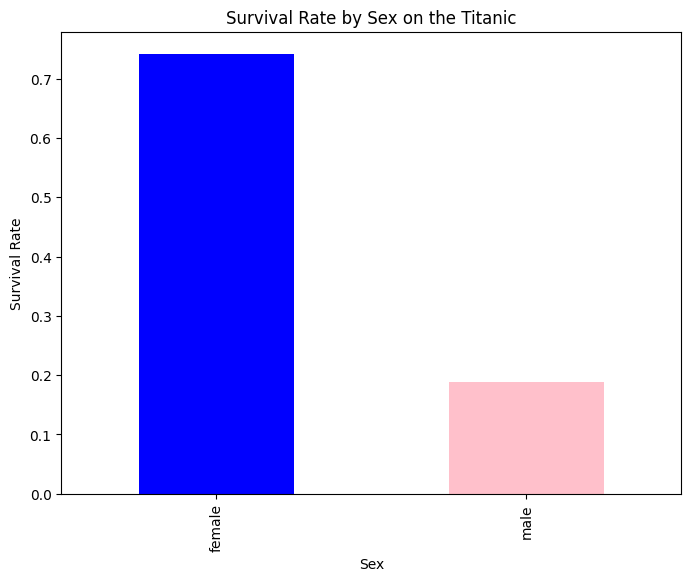

In [ ]:
survival_rate_by_sex = titanic_df.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 6))
survival_rate_by_sex.plot(kind='bar', color=['blue', 'pink'])

plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex on the Titanic')

plt.show()

<ipython-input-9-644def66410f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_df['AgeGroup'] = pd.cut(survived_df['Age'], bins=age_bins, labels=age_labels)
<ipython-input-9-644def66410f>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivor_counts = survived_df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)


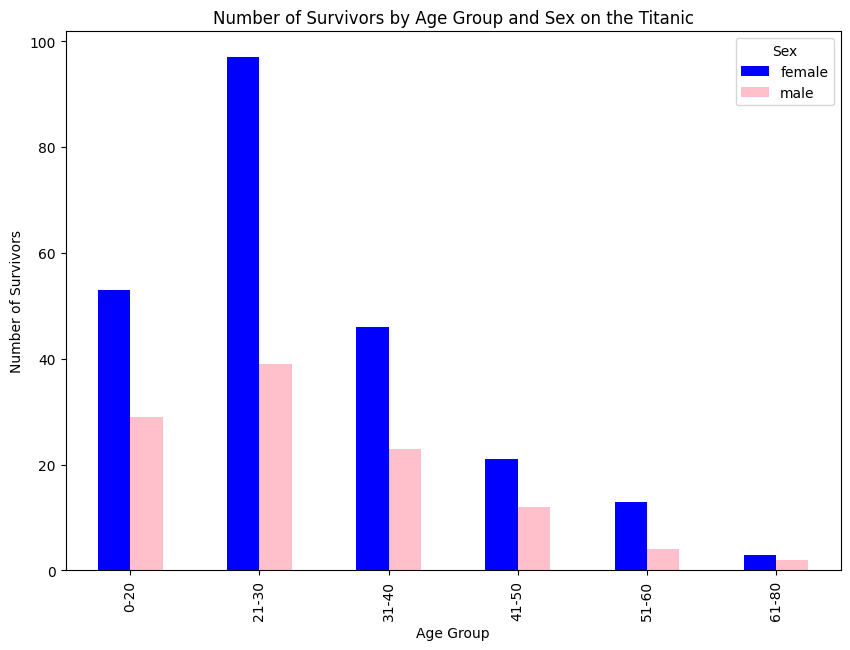

In [ ]:
survived_df = titanic_df[titanic_df['Survived'] == 1]

age_bins = [0, 20, 30, 40, 50, 60, 80]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-80']

survived_df['AgeGroup'] = pd.cut(survived_df['Age'], bins=age_bins, labels=age_labels)

survivor_counts = survived_df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)

survivor_counts.plot(kind='bar', stacked=False, figsize=(10, 7), color=['blue', 'pink'])

plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Age Group and Sex on the Titanic')
plt.legend(title='Sex')

plt.show()

<ipython-input-19-51e63960b54c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic_df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()


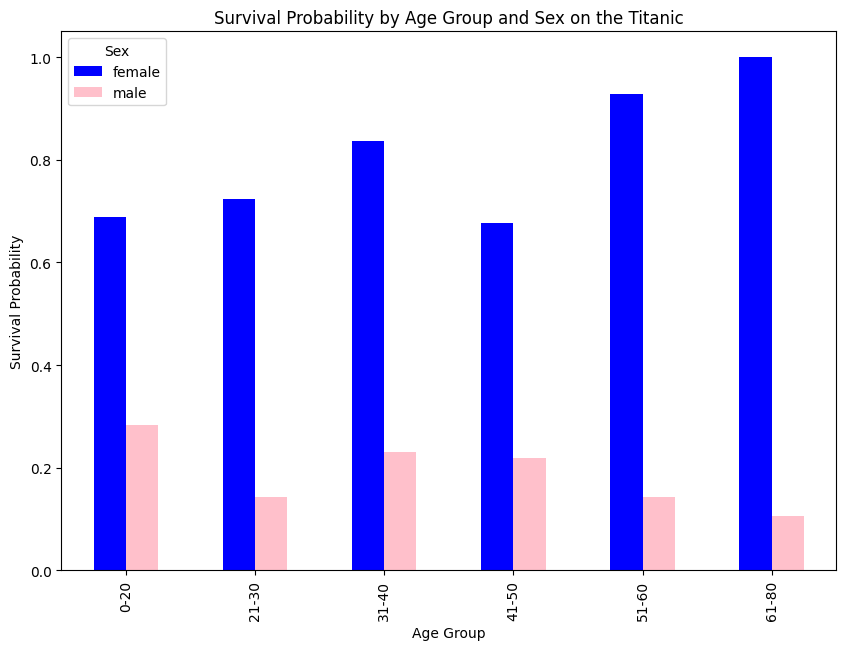

In [ ]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

survival_rates = titanic_df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()

survival_rates.plot(kind='bar', stacked=False, figsize=(10, 7), color=['blue', 'pink'])

plt.xlabel('Age Group')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Age Group and Sex on the Titanic')
plt.legend(title='Sex')

plt.show()

In [ ]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

survival_rates = titanic_df.groupby(['AgeGroup', 'Sex'], observed=False)['Survived'].mean().reset_index()

top_survival_rates = survival_rates.sort_values(by='Survived', ascending=False).head(3)

print(top_survival_rates)

   AgeGroup     Sex  Survived
10    61-80  female  1.000000
8     51-60  female  0.928571
4     31-40  female  0.836364
